### Descrevendo um conjunto de dados

Iremos realizar algumas descrições dos dados com histogramas para verificar a quantidade de alunos que tiraram determinada nota:

In [92]:
from collections import Counter
import matplotlib.pyplot as plt
from typing import List
import math

In [93]:
nota_alunos = [10, 8, 6, 8, 7, 5, 6, 9, 10, 6]

nota_contador = Counter(nota_alunos)
nota_contador # duas pessoas tiraram 10, duas tiraram 8, duas tiraram 6, uma tirou 7.5, e assim por diante

Counter({6: 3, 10: 2, 8: 2, 7: 1, 5: 1, 9: 1})

In [94]:
valor_maximo = max(nota_alunos) # Adquire o valor máximo das notas, no caso, 10
notas_x = range(0,10) # Cria um array de notas de 0 a 10

In [95]:
quantidade_por_nota_y = [nota_contador[nota] for nota in notas_x] # Adquire a quantidade de alunos que tiraram determinada nota
quantidade_por_nota_y

[0, 0, 0, 0, 0, 1, 3, 1, 2, 1]

Text(0, 0.5, 'Quantidade de alunos')

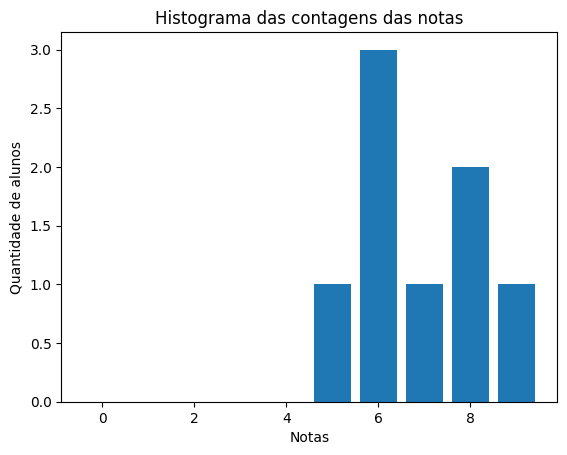

In [96]:
plt.title('Histograma das contagens das notas')
plt.bar(x=notas_x, height=quantidade_por_nota_y)
plt.xlabel('Notas')
plt.ylabel('Quantidade de alunos')

### Algebra Linear

Soma dos quadrados.

Precisamos dessa função de Algebra Linear para realizar algum dos cálculo abaixo.

In [97]:
def soma_dos_quadrados(xs: List[float]) -> float:
    quadrados_dos_xs = [x * x for x in xs]
    return sum(quadrados_dos_xs)

soma_dos_quadrados(nota_alunos)

591

O produto escalar de dois vetores é a soma dos produtos por componente.

In [98]:
def produto_escalar(vector1: List[float], vector2: List[float]) -> float:
    assert len(vector1) == len(vector2), "As listas devem ter o mesmo comprimento"
    print('Visualização da compactação das listas:', list(zip(vector1, vector2)))
    return sum(v_1 * v_2 for v_1, v_2 in zip(vector1, vector2))

### Tendências Centrais

Geralmente, queremos ter alguma noção sobre o ponto central dos dados. Para isso, costumamos usar a *média*, que consiste na soma dos dados dividido pela sua contagem.

In [99]:
def media(xs: List[float]) -> float:
    return sum(xs) / len(xs)

media(nota_alunos) # Média das notas dos alunos

7.5

Também temos a *mediana*, que corresponde ao valor do meio (quando o número de pontos de dados é **ímpar**) ou à média dos dois valores do meio (quando o número de pontos de dados é **par**).

In [100]:
# Para listas com tamanho ímpar
def _mediana_impar(xs: List[float]) -> float:
    '''Se len(xs) for ímpar, a mediana será o elemento do meio'''
    return sorted(xs)[len(xs) // 2] # Ordena a lista e em seguida, adquire o elemento do meio da lista

# Para listas com tamanho par
def _mediana_par(xs: List[float]) -> float:
    '''Se len(xs) for par, a mediana será a média dos dois elementos do meio'''
    xs_ordenado = sorted(xs)
    meio = len(xs) // 2 # Por exemplo: Se o array tem comprimento 4, o meio é 2
    return (xs_ordenado[meio - 1] + xs_ordenado[meio]) / 2

# Função pública que deve ser chamada para realizar mediana (aqui contem as verificações se a lista é par ou ímpar)
def mediana(xs: List[float]) -> float:
    return _mediana_par(xs) if len(xs) % 2 == 0 else _mediana_impar(xs)

In [101]:
# Mediana das notas:
mediana(nota_alunos)

7.5

### Dispersão

A *dispersão* expressa a medida da distribuição dos dados. Aqui, em geral:

Os valores **próximos de zero** indicam que os dados **não estão espalhados**.

Os valores **maiores** (ou algo assim) indicam dados **muito espalhados**.

Por exemplo, uma medida simples disso é a *amplitude*, a diferença entre o maior elemento e o menor.

In [102]:
# A diferença entre o maior elemento e o menor
def diferenca(xs: List[float]) -> float:
    return max(nota_alunos) - min(nota_alunos)

diferenca(nota_alunos)

5

Uma médida de dispersão mais complexa é a **variância**.

In [103]:
def subtrai_medias(xs: List[float]) -> List[float]:
    '''Traduza xs subtraindo sua média (para que o resultado tenha média 0)'''
    x_media = media(xs)
    return [x - x_media for x in xs]

def variancia(xs: List[float]) -> float:
    '''Quase o desvio quadrado médio da média'''
    comprimento_xs = len(xs)
    assert comprimento_xs >= 2, "xs precisa ter ao menos 2 elementos"

    desvios = subtrai_medias(xs)
    return soma_dos_quadrados(desvios) / comprimento_xs -1

variancia(nota_alunos) # O resultado indica que os dados não estão espalhados

1.85

**Desvio padrão**

In [104]:
def desvio_padrao(xs: List[float]) -> float:
    '''O desvio-padrão é a raiz quadrada da variância'''
    return math.sqrt(variancia(xs))

desvio_padrao(nota_alunos)

1.3601470508735443

### Correlação

Há uma hipótese: o tempo que um aluno passa estudando está associado às suas notas. Vamos verificar essa hipótese.

Primeiro, analisaremos a **covariância**, um tipo de variância aplicada a pares. Se a variância mede o desvio de uma variável da média, a *covariância* mede a variação simultânea de duas variáveis em relação às suas médias.

Uma **covariância positiva** "alta" indica que **x** tende a ser alto quando **y** é alto, e **x** tende a ser baixo quando **y** é baixo.

Uma **covariância negativa** "alta" indica o oposto, que **x** tende a ser baixo quando **y** é alto e vice e versa.

Uma **covariância próxima de zero indica que essa relação não existe**.

In [113]:
tempo_estudos = [4, 10, 7, 6, 2, 2, 1, 9, 6, 7, 1, 10, 8, 2, 2, 2, 3, 5, 4, 
                 3, 6, 1, 3, 4, 5, 8, 2, 5, 6, 0]

nota_alunos = [4, 10, 7, 6, 3, 5, 2, 8, 8, 6, 2, 8, 7, 4, 4, 4, 4, 6, 4, 
               4, 6, 4, 5, 3, 6, 8, 3, 7, 8, 10]

In [106]:
def covariancia(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "As listas devem ter o mesmo comprimento"

    return produto_escalar(subtrai_medias(xs), subtrai_medias(ys)) / len(xs) - 1

In [107]:
covariancia(nota_alunos, tempo_estudos)

Visualização da compactação das listas: [(-1.5333333333333332, -0.43333333333333357), (4.466666666666667, 5.566666666666666), (1.4666666666666668, 2.5666666666666664), (0.4666666666666668, 1.5666666666666664), (-2.533333333333333, -2.4333333333333336), (-0.5333333333333332, -2.4333333333333336), (-3.533333333333333, -3.4333333333333336), (2.466666666666667, 4.566666666666666), (2.466666666666667, 1.5666666666666664), (0.4666666666666668, 2.5666666666666664), (-3.533333333333333, -4.433333333333334), (2.466666666666667, 5.566666666666666), (1.4666666666666668, 3.5666666666666664), (-1.5333333333333332, -2.4333333333333336), (-1.5333333333333332, -2.4333333333333336), (-1.5333333333333332, -2.4333333333333336), (-1.5333333333333332, -1.4333333333333336), (0.4666666666666668, 0.5666666666666664), (-1.5333333333333332, -0.43333333333333357), (-1.5333333333333332, -1.4333333333333336), (0.4666666666666668, 1.5666666666666664), (-1.5333333333333332, -3.4333333333333336), (-0.5333333333333332

3.1688888888888878

Porém, é mais comum calcular a **correlação**, que divide os *desvios-padrão* das duas variáveis:

In [108]:
def correlacao(xs: List[float], ys: List[float]) -> float:
    '''Mede a variação simultânea de xs e ys a partir de suas médias'''
    desvio_x = desvio_padrao(xs)
    desvio_y = desvio_padrao(ys)

    if desvio_x > 0 and desvio_y > 0:
        return covariancia(xs, ys) / desvio_x / desvio_y
    else:
        return 0 # Se não houver variação, a correlação será zero
    
correlacao(nota_alunos, tempo_estudos)

Visualização da compactação das listas: [(-1.5333333333333332, -0.43333333333333357), (4.466666666666667, 5.566666666666666), (1.4666666666666668, 2.5666666666666664), (0.4666666666666668, 1.5666666666666664), (-2.533333333333333, -2.4333333333333336), (-0.5333333333333332, -2.4333333333333336), (-3.533333333333333, -3.4333333333333336), (2.466666666666667, 4.566666666666666), (2.466666666666667, 1.5666666666666664), (0.4666666666666668, 2.5666666666666664), (-3.533333333333333, -4.433333333333334), (2.466666666666667, 5.566666666666666), (1.4666666666666668, 3.5666666666666664), (-1.5333333333333332, -2.4333333333333336), (-1.5333333333333332, -2.4333333333333336), (-1.5333333333333332, -2.4333333333333336), (-1.5333333333333332, -1.4333333333333336), (0.4666666666666668, 0.5666666666666664), (-1.5333333333333332, -0.43333333333333357), (-1.5333333333333332, -1.4333333333333336), (0.4666666666666668, 1.5666666666666664), (-1.5333333333333332, -3.4333333333333336), (-0.5333333333333332

0.625296915142125

A correlação não tem unidade e sempre fica entre -1 (anticorrelação perfeita) e 1 (correlação perfeita). O número 0.62 indica uma correlação positiva alta, pois está próxima de 1.

Porém, até agora não examinamos os dados:

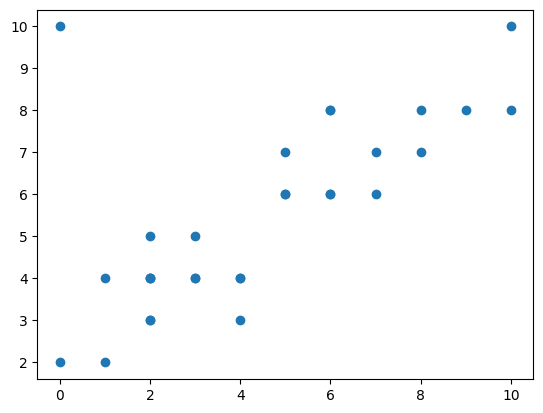

In [109]:
plt.scatter(x=tempo_estudos, y=nota_alunos)

A pessoa que tirou 10 e que não estuda nada (tempo de estudos zero) é um outlier imenso, e a correlação pode ser muito sensível a isso. O que acontece se ignorarmos o outlier?

In [115]:
outlier = tempo_estudos.index(0) # Resgata o índice do outlier que o tempo de estudos é zero (0)
outlier 

29

In [116]:
tempo_estudos_sem_outlier = [x for index, x in enumerate(tempo_estudos) if index != outlier] # Remove o índice do outlier do tempo estudos

nota_alunos_sem_outlier = [x for index, x in enumerate(nota_alunos) if index != outlier] # Remove o índice do outlier do nota alunos

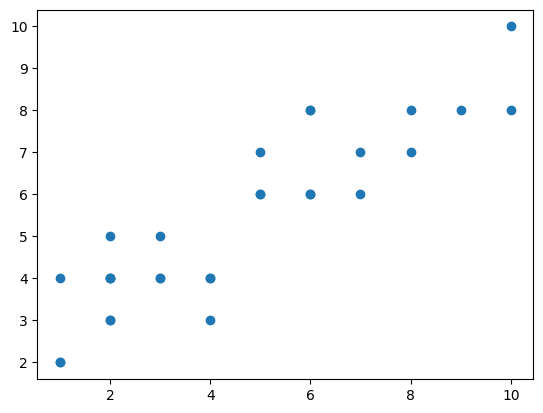

In [117]:
plt.scatter(x=tempo_estudos_sem_outlier, y=nota_alunos_sem_outlier)

Sem o outlier, a correlação é bem mais forte:

In [119]:
correlacao(nota_alunos_sem_outlier, tempo_estudos_sem_outlier)

Visualização da compactação das listas: [(-1.3793103448275863, -0.6206896551724137), (4.620689655172414, 5.379310344827586), (1.6206896551724137, 2.3793103448275863), (0.6206896551724137, 1.3793103448275863), (-2.3793103448275863, -2.6206896551724137), (-0.3793103448275863, -2.6206896551724137), (-3.3793103448275863, -3.6206896551724137), (2.6206896551724137, 4.379310344827586), (2.6206896551724137, 1.3793103448275863), (0.6206896551724137, 2.3793103448275863), (-3.3793103448275863, -3.6206896551724137), (2.6206896551724137, 5.379310344827586), (1.6206896551724137, 3.3793103448275863), (-1.3793103448275863, -2.6206896551724137), (-1.3793103448275863, -2.6206896551724137), (-1.3793103448275863, -2.6206896551724137), (-1.3793103448275863, -1.6206896551724137), (0.6206896551724137, 0.3793103448275863), (-1.3793103448275863, -0.6206896551724137), (-1.3793103448275863, -1.6206896551724137), (0.6206896551724137, 1.3793103448275863), (-1.3793103448275863, -3.6206896551724137), (-0.37931034482

0.8806956213434156